# 🧠 Understanding Model Evaluation and the Bias–Variance Tradeoff
<a href="https://colab.research.google.com/github/ntu-dl-bootcamp/deep-learning-2026/blob/main/SESSION1/session1_p2.ipynb" target="_blank"><img alt="Open In Colab" src="https://colab.research.google.com/assets/colab-badge.svg"/></a>

Welcome to this beginner-friendly, hands-on tutorial!  
In this notebook, we’ll walk through how to **evaluate and improve a machine learning model** step by step —  
using the **California Housing dataset** as a running example.

Our aim is to make model evaluation *intuitive, visual, and practical* —  
so by the end, you’ll not only know how to train models, but also how to think about their performance.

---

## 🎯 What You’ll Learn

By the end of this session, you’ll be able to:
- 📊 Prepare and explore data for an ML problem  
- ✂️ Split data correctly for training and testing  
- 🌳 Train and interpret a Decision Tree model  
- 📏 Measure model performance using RMSE and R²  
- ⚖️ Understand the bias–variance tradeoff and tune model hyperparameters  

> 💡 These steps form a **blueprint for applied machine learning**.  Whether you work in materials science, healthcare, finance, or social sciences —  you’ll be able to use this same process to approach problems in your own field.

---

## 🏌️ A Simple Analogy — The “Golf Prediction” Example

Imagine you’re trying to predict golf activity based on weather:
- 🌦️ *Will someone play golf today or not?* → **Classification problem**  
- ⛳ *How many hours will they play golf today?* → **Regression problem**

In this tutorial, we’ll focus on the **regression case** —  predicting a *continuous number* (i.e. predicting median house prices).

---

## 🧭 Step-by-Step Roadmap

### 1️⃣ Preparing and Inspecting the Data
- Load the dataset and understand what each feature represents.  
- Visualize distributions and feature correlations.  
- (Optional) Try one-hot encoding and feature scaling to see how preprocessing works.

### 2️⃣ Splitting the Data (Training vs Testing)
- Divide data into **training** and **testing** sets.  
- Learn why we need separate data for evaluation — so we can measure generalization.  

### 3️⃣ Picking a Model — Decision Tree
- Introduce **Decision Trees** as intuitive, rule-based models.  
- Train your first model using scikit-learn’s `DecisionTreeRegressor`.  
- Understand what model parameters and hyperparameters mean.

### 4️⃣ Evaluating Model Performance
- Use **RMSE** to measure average prediction error.  
- Use **R²** to measure how well predictions follow the true trend.  
- Compare training and test metrics to identify how well the model generalizes.

### 5️⃣ Hyperparameters and Fair Tuning
- Experiment with `max_depth` to see how model complexity affects results.  
- Revisit **data splitting** — introduce the **validation set** to tune hyperparameters fairly (without touching the test set).  
- Observe how performance changes across depths and discuss which seems best.

### 6️⃣ Bias–Variance Tradeoff — Understanding Model Complexity
- Visualize how training and validation errors change as tree depth increases.  
- Understand:
  - **Underfitting (High Bias):** model too simple to learn patterns.  
  - **Overfitting (High Variance):** model too complex, memorizes noise.  
- Identify the “sweet spot” where the model performs best on new data.

### 7️⃣ Bonus Section — Reducing Variance with Ensembles
- Learn how **Random Forests** combine many decision trees to create a stronger, more stable model.  
- Perform a small grid search to find the best Random Forest hyperparameters.  
- Compare results with your tuned Decision Tree and discuss why ensembles often perform better.

---

## 🌍 Why This Matters

This tutorial mirrors the **flow of any applied ML problem**:
1. Define your prediction goal.  
2. Explore and understand your dataset.  
3. Train a model and measure its performance.  
4. Tune hyperparameters and validate improvements.  
5. Interpret results through the lens of bias–variance.  
6. Use ensemble methods to improve robustness.

> 🧩 These ideas apply across all disciplines.  
> If you can frame a question in terms of prediction and collect relevant data,  
> this workflow will help you apply ML or DL methods systematically to your domain.

---

> ✅ **In short:**  
> This notebook is your *field guide* to evaluating, tuning, and understanding machine learning models —  
> from preparing data and training your first tree, to diagnosing bias–variance behavior and improving performance with ensembles.


In [1]:
# =========================================================
# 📦 STEP 1: Import all the libraries we will use
# =========================================================
# Think of this as packing your toolbox before starting a project.

# --- Core Python libraries ---
import numpy as np                     # For handling numerical data
import pandas as pd                    # For working with tabular (spreadsheet-like) data

# --- Visualization libraries ---
import matplotlib.pyplot as plt        # For plotting graphs
import seaborn as sns                  # Makes plots look cleaner and more appealing

# --- Machine Learning libraries from scikit-learn ---
from sklearn.datasets import fetch_california_housing  # Built-in real-world dataset
from sklearn.model_selection import train_test_split   # To split data into train/test sets
from sklearn.tree import DecisionTreeRegressor         # Our first model (simple and interpretable)
from sklearn.ensemble import RandomForestRegressor     # Ensemble model (many trees combined)
from sklearn.metrics import mean_squared_error, r2_score  # For measuring performance

# --- Optional: make the plots look consistent and nice ---
sns.set(style="whitegrid", palette="muted", font_scale=1.2)

# --- Optional: define a random seed for reproducibility ---
RANDOM_SEED = 42
np.random.seed(RANDOM_SEED)

print("✅ Libraries loaded successfully. Ready to begin!")

✅ Libraries loaded successfully. Ready to begin!


# 🧾 Step 1: Preparing and Inspecting the Data

Before we can train any model, we need to **load and understand our dataset**.

Machine learning models don’t work directly on raw data — they need clean, structured information.  
So our first step is to **inspect what we’re working with**.

In this tutorial, we’ll use the **California Housing dataset**, which contains data about different neighborhoods in California:
- 🏡 Each row represents one district (a small area)
- 📈 The features include things like median income, average rooms per house, and population
- 🎯 The target variable (`MedHouseVal`) is the **median house value** in that district

Let’s load the dataset, check how many examples and features we have, and take a quick peek at the data.

> **Tip:** Always start by exploring the dataset before jumping into modeling.  
> This helps you notice missing values, incorrect data, or unusual patterns early on.


In [2]:
# =========================================================
# 1️⃣ STEP 1: Preparing and Inspecting the Data
# =========================================================

# The California Housing dataset is included with scikit-learn.
# It’s a great starter dataset for regression problems (predicting continuous values).
# Setting `as_frame=True` gives us a nice pandas DataFrame directly.
cal = fetch_california_housing(as_frame=True)

# Separate the features (inputs) and the target variable (output we want to predict)
X = cal.data   # 'X' usually stands for the input variables (independent variables)
y = cal.target # 'y' is the target variable (dependent variable — what we want to predict)

# Display the shape of the feature matrix
# This tells us how many samples (rows) and features (columns) we have
print("✅ Dataset loaded successfully!")
print(f"Feature matrix shape: {X.shape}")
print(f"Number of samples: {X.shape[0]}")
print(f"Number of features: {X.shape[1]}")

✅ Dataset loaded successfully!
Feature matrix shape: (20640, 8)
Number of samples: 20640
Number of features: 8


## 🔍 Inspecting the Data

Before we do any modeling, we need to **understand what our dataset looks like**.  
This step is called **exploratory data inspection** — it’s like reading the recipe before cooking.

We’ll start by printing a few rows from the dataset to get a quick feel for it.  
This lets us answer some basic but important questions:
- What kind of features do we have?  
- Are they numbers, categories, or something else?  
- Do the values look reasonable?

By default, the `head()` function in pandas shows the **first 5 rows** of a DataFrame, but you can pass a number (like `head(10)`) to see more.

We’ll also print the **shape** of the dataset — it tells us how many rows and columns there are:
- `X.shape[0]` → the number of **examples** (districts)
- `X.shape[1]` → the number of **features** (columns)

Once you know what the data looks like, it’s much easier to decide how to clean or prepare it for a model.

> 🧭 **Want to explore more?**  
> You can visit the [California Housing dataset page](https://scikit-learn.org/stable/datasets/real_world.html#california-housing-dataset) on scikit-learn’s website for a full description of each feature.


In [3]:
# =========================================================
# 👀 STEP 1.1: Inspect the dataset
# =========================================================

# The simplest and most common first step when exploring data
# is to look at the first few rows. This helps us understand:
# - what kind of features are present
# - what the values look like
# - whether there are any obvious issues (like missing data)

print("\n📊 Preview of the dataset:")
display(X.head())  # display() works nicely in notebooks for readable tables

# If you want to see more than 5 rows, try X.head(10) or X.tail() to see the last few.


📊 Preview of the dataset:


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [4]:
# ---------------------------------------------------------
# Let's summarize what we’ve learned so far
# ---------------------------------------------------------
print("\n📏 Dataset dimensions:")
print(f"Number of rows (examples): {X.shape[0]}")
print(f"Number of columns (features): {X.shape[1]}")

# You can also check the column names (feature list)
print("\n🔤 Feature names:")
print(list(X.columns))

# Optional: view summary statistics (mean, std, min, max) for numerical columns
# This helps check the data range and potential outliers.
print("\n📈 Quick summary statistics:")
print(X.describe())

# --- Beginner tips ---
# • X.shape[0] gives you the total number of observations (districts)
# • X.shape[1] gives you the total number of input features
# • X.describe() is a quick way to check basic statistics for each feature
# • X.columns gives you the names of all the features in your dataset


📏 Dataset dimensions:
Number of rows (examples): 20640
Number of columns (features): 8

🔤 Feature names:
['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']

📈 Quick summary statistics:
             MedInc      HouseAge      AveRooms     AveBedrms    Population  \
count  20640.000000  20640.000000  20640.000000  20640.000000  20640.000000   
mean       3.870671     28.639486      5.429000      1.096675   1425.476744   
std        1.899822     12.585558      2.474173      0.473911   1132.462122   
min        0.499900      1.000000      0.846154      0.333333      3.000000   
25%        2.563400     18.000000      4.440716      1.006079    787.000000   
50%        3.534800     29.000000      5.229129      1.048780   1166.000000   
75%        4.743250     37.000000      6.052381      1.099526   1725.000000   
max       15.000100     52.000000    141.909091     34.066667  35682.000000   

           AveOccup      Latitude     Longitude  
coun

## 🔎 Visualizing the Data

Now that we’ve loaded the California Housing dataset, let’s take a quick visual tour of it.  
This step is called **Exploratory Data Analysis (EDA)** — it helps us understand what the data *looks like* and *how the features relate to the target*.

Here are the main things we’ll check:

1. **Distributions** — Are the features normally distributed, skewed, or have outliers?  
   We’ll use **histograms** to get a sense of their shapes.

2. **Relationships with the target variable** —  
   How do features like income or house age relate to **median house value**?  
   We’ll use **scatter plots** to spot visible trends or correlations.

3. **Feature correlations** —  
   A **heatmap** shows how strongly each feature relates to others, and especially to the target variable.

> 🧠 **Why this matters:**  
> - Distributions tell us whether we need transformations or scaling.  
> - Correlations tell us which features might be most useful for prediction.  
> - Visuals help us *see* the data before jumping into modeling.


<Figure size 1400x1000 with 0 Axes>

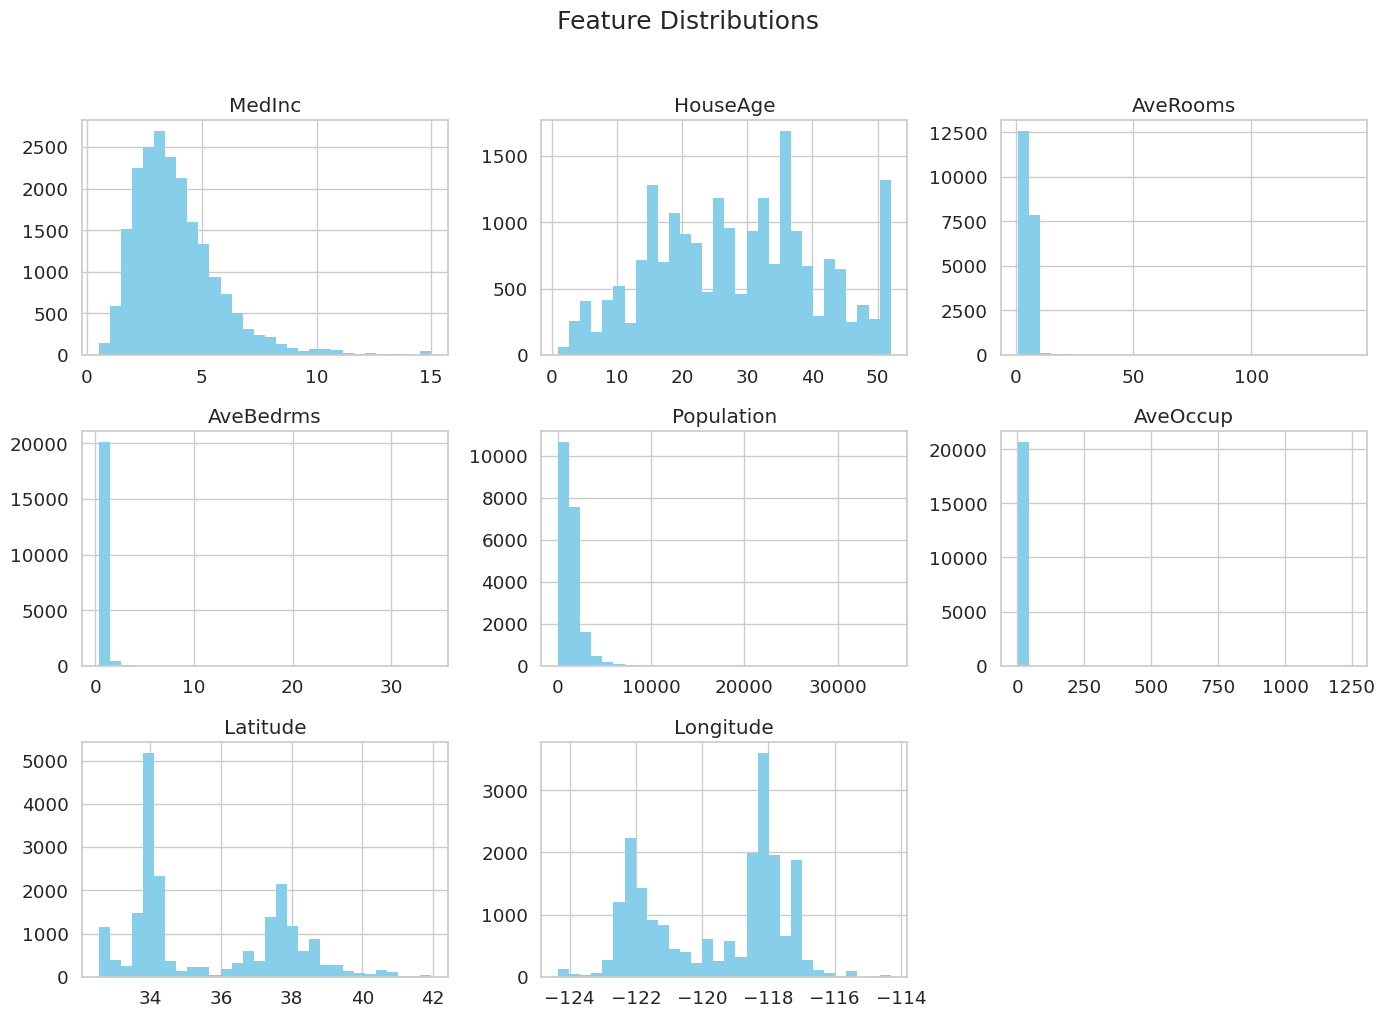

In [5]:
# =========================================================
# 🔎 STEP 1.2: Exploratory Data Analysis (EDA)
# =========================================================

sns.set(style="whitegrid", palette="muted", font_scale=1.2)

# ---------------------------------------------------------
# (A) Histograms — look at how each feature is distributed
# ---------------------------------------------------------
# This helps identify skewed data, outliers, or unusual ranges.
plt.figure(figsize=(14, 10))
X.hist(bins=30, color='skyblue', edgecolor='none', figsize=(14, 10))
plt.suptitle("Feature Distributions", fontsize=18, y=1.02)
plt.tight_layout()
plt.show()

# Beginner notes:
# - If the histogram is skewed (e.g., heavily right-tailed), you might later apply transformations (like log or sqrt).
# - Features with wide ranges might benefit from scaling.

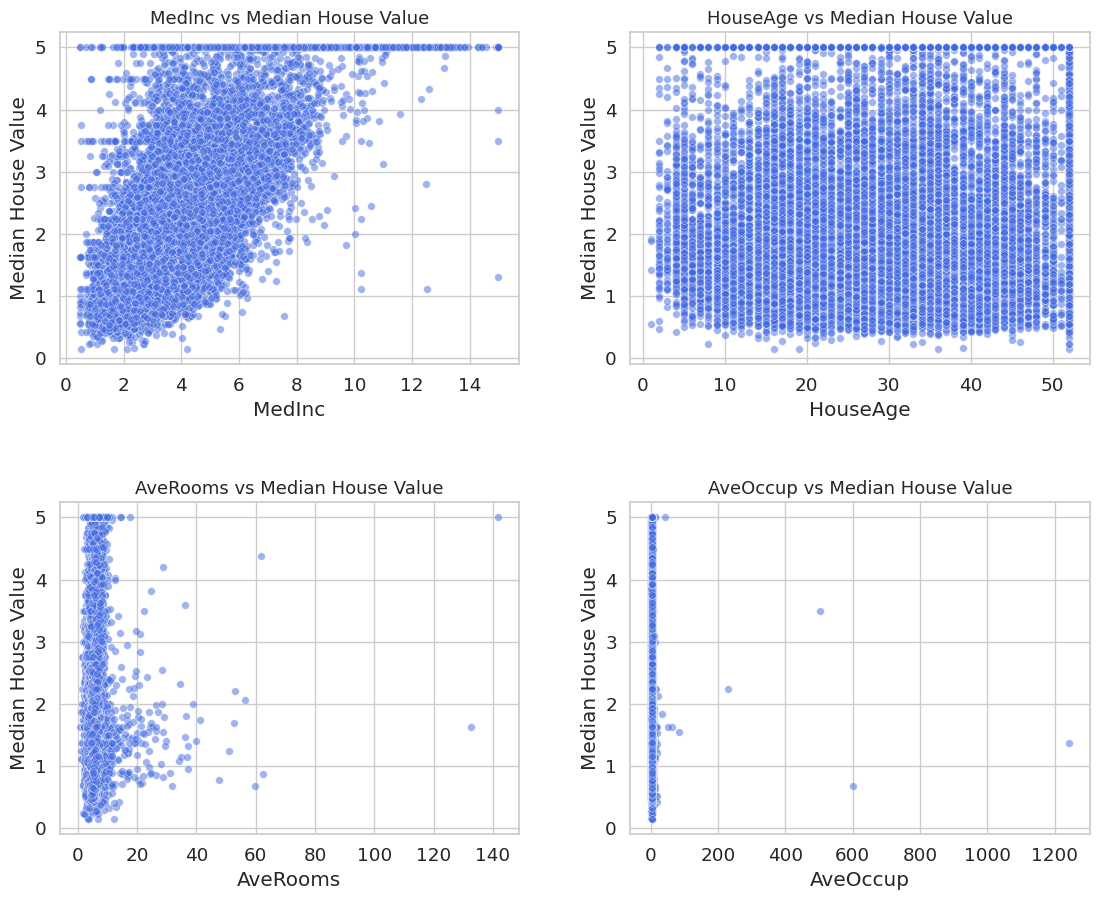

In [6]:
# ---------------------------------------------------------
# (B) Scatter plots — check how some key features relate to the target
# ---------------------------------------------------------
cols = ['MedInc', 'HouseAge', 'AveRooms', 'AveOccup']

# Create 2x2 subplots for cleaner visualization
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
for ax, col in zip(axes.flatten(), cols):
    sns.scatterplot(x=X[col], y=y, alpha=0.5, ax=ax, color='royalblue', s=30)
    ax.set_title(f"{col} vs Median House Value", fontsize=13)
    ax.set_xlabel(col)
    ax.set_ylabel("Median House Value")

plt.tight_layout(pad=3)
plt.show()

# Beginner notes:
# - If you see an upward trend, it suggests a positive correlation (as one increases, so does the other).
# - For example, higher MedInc (median income) usually means higher house prices.

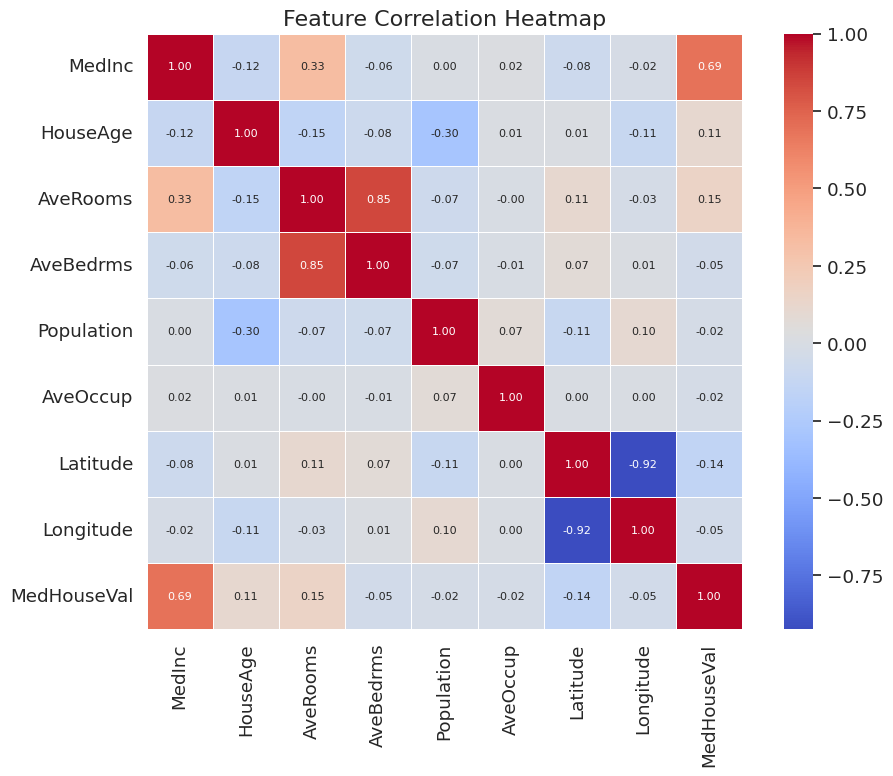

In [7]:
# ---------------------------------------------------------
# (C) Correlation Heatmap — summarize relationships between all variables
# ---------------------------------------------------------
# Combine features and target into one DataFrame
corr = pd.concat([X, y.rename("MedHouseVal")], axis=1).corr()

plt.figure(figsize=(10, 8))
sns.heatmap(
    corr,
    annot=True, fmt=".2f",
    cmap="coolwarm", cbar=True, square=True,
    linewidths=0.5, annot_kws={"size": 8}
)
plt.title("Feature Correlation Heatmap", fontsize=16)
plt.tight_layout()
plt.show()

# Beginner notes:
# - Correlation values range from -1 to +1.
#   +1 → perfect positive relationship, -1 → perfect negative relationship, 0 → no relationship.
# - Look for features that have high correlation with the target (MedHouseVal).
#   Those will likely be important predictors.


---

## 💬 **Activity 1 — Let’s Discuss!**

Now that we’ve visualized the data, let’s pause and think critically about what we’ve seen.

#### 🧠 Question 1: Which features are most correlated with the target?
Take a look at the correlation heatmap and scatter plots you created.

<details>
<summary>💡 Show hints</summary>

- Which feature shows the *strongest upward trend* with the target?  
- Which correlations in the heatmap are closer to **+1** or **−1**?  
- Does the relationship look linear, or does it flatten after a point?  
- *Hint:* `MedInc` (Median Income) often has the strongest positive link to house value.  

</details>

---

#### 🧩 Question 2: Which features might be redundant or overlapping?
Sometimes, two or more features capture similar information — this is called **multicollinearity**. It’s like having two friends telling you the same story twice — not very helpful to the model!

<details>
<summary>💡 Show hints</summary>

- Do any features have very high correlation with **each other**?  
- Why can that cause issues in some models (like linear regression)?  
- How could you handle redundant features (drop one, combine them, or use PCA)?  
- *Hint:* Try comparing `AveRooms`, `AveBedrms`, and `HouseAge`.  

</details>

---

🗣️ **In-Class Idea:** Discuss your answers in small groups and compare which features each team found most important.

---


## 🧩 Optional: Encoding Categorical Features (One-Hot Encoding)

Many ML models expect **numbers**, not words.  
If a feature is **categorical** (e.g., animal *species*), we should convert it to numbers **without inventing a fake order**.

- **Label encoding** maps each category to a number (cat→0, dog→1, …).  
  This can accidentally introduce an **order** the model may misinterpret.
- **One-hot encoding** creates **one column per category** and fills with 0/1.  
  This avoids the fake “less-than/greater-than” relationship.

We’ll use a tiny example to see:
- A `species` column (`cat`, `dog`, `snake`, `turtle`)
- One-hot encoding with **pandas** and with **scikit-learn**

> Tip: When using linear models, consider `drop_first=True` (or `drop='first'` in scikit-learn) to avoid perfect multicollinearity.


In [8]:
# ---------------------------------------------------------
# ONE-HOT ENCODING: Stand-alone mini example
# ---------------------------------------------------------
import pandas as pd
import numpy as np

# Tiny toy dataset with a categorical column
df_animals = pd.DataFrame({
    "id": [1, 2, 3, 4, 5, 6, 7],
    "species": ["cat", "dog", "snake", "cat", "dog", "turtle", "dog"]
})

print("Original data:")
print(df_animals)

Original data:
   id species
0   1     cat
1   2     dog
2   3   snake
3   4     cat
4   5     dog
5   6  turtle
6   7     dog


In [9]:
# ---------- Option A: Pandas get_dummies ----------
# Fast and simple for quick experiments
onehot_pandas = pd.get_dummies(df_animals, columns=["species"], prefix="is", dtype=int)
print("\nOne-hot encoded with pandas.get_dummies:")
print(onehot_pandas)


One-hot encoded with pandas.get_dummies:
   id  is_cat  is_dog  is_snake  is_turtle
0   1       1       0         0          0
1   2       0       1         0          0
2   3       0       0         1          0
3   4       1       0         0          0
4   5       0       1         0          0
5   6       0       0         0          1
6   7       0       1         0          0


In [10]:
# ---------- Option B: scikit-learn OneHotEncoder ----------
# Useful inside ML pipelines; can handle train/test consistently
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder(sparse_output=False, handle_unknown="ignore")
encoded = ohe.fit_transform(df_animals[["species"]])  # must be 2D

encoded_df = pd.DataFrame(encoded, columns=ohe.get_feature_names_out(["species"]), index=df_animals.index)
onehot_sklearn = pd.concat([df_animals.drop(columns=["species"]), encoded_df], axis=1)

print("\nOne-hot encoded with sklearn.OneHotEncoder:")
print(onehot_sklearn)

# Notes:
# - OneHotEncoder returns a NumPy array; we wrap it into a DataFrame for readability.
# - handle_unknown='ignore' is helpful when test data contains a new category.
# - For linear models you can use OneHotEncoder(drop='first') to drop one column per category.


One-hot encoded with sklearn.OneHotEncoder:
   id  species_cat  species_dog  species_snake  species_turtle
0   1          1.0          0.0            0.0             0.0
1   2          0.0          1.0            0.0             0.0
2   3          0.0          0.0            1.0             0.0
3   4          1.0          0.0            0.0             0.0
4   5          0.0          1.0            0.0             0.0
5   6          0.0          0.0            0.0             1.0
6   7          0.0          1.0            0.0             0.0


## 📏 Optional: Feature Scaling (Why and How)

Features often live on **different scales** (e.g., temperature in Kelvin vs. humidity in 0–1).  
Some models (like **k-NN, SVM, linear/logistic regression, neural nets**) are **sensitive to scale** because they use distances or gradients.  
Other models (like **decision trees and random forests**) are **mostly insensitive** to scaling.

Two common scaling methods:
- **Standardization** (`StandardScaler`): center to mean 0 and variance 1  
- **Min-Max scaling** (`MinMaxScaler`): squish each feature to a fixed range, usually [0, 1]

We’ll use a tiny example with three columns:
- `temp_K` (270–305), `humidity` (0–1), `day_of_year` (1–365)
and show before/after scaling.


In [11]:
# ---------------------------------------------------------
# FEATURE SCALING: Stand-alone mini example
# ---------------------------------------------------------
import pandas as pd
import numpy as np

# Tiny toy dataset with very different scales/units
df_weather = pd.DataFrame({
    "temp_K":      [272.0, 289.5, 301.2, 295.0, 280.3],  # Kelvin
    "humidity":    [0.15,  0.80,  0.40,  0.60,  0.05],   # 0–1
    "day_of_year": [  12,   150,   230,   320,    45]    # 1–365
})

print("Original (unscaled) data:")
print(df_weather)
print("\nColumn means (unscaled):")
print(df_weather.mean().round(3))
print("\nColumn std dev (unscaled):")
print(df_weather.std(ddof=0).round(3))  # population std for clarity

Original (unscaled) data:
   temp_K  humidity  day_of_year
0   272.0      0.15           12
1   289.5      0.80          150
2   301.2      0.40          230
3   295.0      0.60          320
4   280.3      0.05           45

Column means (unscaled):
temp_K         287.6
humidity         0.4
day_of_year    151.4
dtype: float64

Column std dev (unscaled):
temp_K          10.392
humidity         0.277
day_of_year    114.332
dtype: float64


In [12]:
# ---------- Option A: Standardization (mean=0, std=1) ----------
from sklearn.preprocessing import StandardScaler

std_scaler = StandardScaler()
weather_std = pd.DataFrame(std_scaler.fit_transform(df_weather),
                           columns=df_weather.columns)

print("\nStandardized data (≈ mean 0, std 1):")
print(weather_std.round(3))
print("\nMeans after standardization (should be ~0):")
print(weather_std.mean().round(3))
print("\nStd dev after standardization (should be ~1):")
print(weather_std.std(ddof=0).round(3))


Standardized data (≈ mean 0, std 1):
   temp_K  humidity  day_of_year
0  -1.501    -0.901       -1.219
1   0.183     1.441       -0.012
2   1.309     0.000        0.687
3   0.712     0.721        1.475
4  -0.702    -1.261       -0.931

Means after standardization (should be ~0):
temp_K        -0.0
humidity       0.0
day_of_year   -0.0
dtype: float64

Std dev after standardization (should be ~1):
temp_K         1.0
humidity       1.0
day_of_year    1.0
dtype: float64


In [13]:
# ---------- Option B: Min–Max scaling to [0, 1] ----------
from sklearn.preprocessing import MinMaxScaler

mm_scaler = MinMaxScaler(feature_range=(0, 1))
weather_mm = pd.DataFrame(mm_scaler.fit_transform(df_weather),
                          columns=df_weather.columns)

print("\nMin–Max scaled data (range ~[0, 1]):")
print(weather_mm.round(3))
print("\nMin per column after Min–Max scaling (should be 0):")
print(weather_mm.min().round(3))
print("\nMax per column after Min–Max scaling (should be 1):")
print(weather_mm.max().round(3))

# Notes:
# - Always fit scalers on the TRAIN set, then transform both train and test with that fitted scaler.
# - Tree-based models (DecisionTree/RandomForest) usually don’t need scaling.
# - Distance/gradient-based models often benefit a lot from scaling.


Min–Max scaled data (range ~[0, 1]):
   temp_K  humidity  day_of_year
0   0.000     0.133        0.000
1   0.599     1.000        0.448
2   1.000     0.467        0.708
3   0.788     0.733        1.000
4   0.284     0.000        0.107

Min per column after Min–Max scaling (should be 0):
temp_K         0.0
humidity       0.0
day_of_year    0.0
dtype: float64

Max per column after Min–Max scaling (should be 1):
temp_K         1.0
humidity       1.0
day_of_year    1.0
dtype: float64


# ✂️ Step 2: Splitting the Data (Training vs Testing)

Now that our dataset is clean and explored, it’s time to prepare it for **machine learning**.  
Before we train a model, we should always split the data into **two parts**:

- 🧩 **Training set** — the data our model *learns from*  
- 🧪 **Testing set** — the data we *evaluate* the model on later

Why do we do this?  
Because we want to know how well our model performs on **new, unseen data**, not just the data it has already memorized.

> 💡 Think of it like studying for an exam:
> - One student **understands the concepts** — they can solve new problems on test day.  
> - Another **memorizes every homework problem** — they struggle when the test questions look different.  
>
> Machine learning works the same way — we want our model to **generalize** its understanding, not just memorize.

We typically use **80% of the data for training** and **20% for testing**, but this ratio can vary depending on dataset size.  
Most importantly, we **shuffle the data** before splitting to ensure both sets are representative of the whole dataset.

Let’s perform this split next.


In [14]:
# =========================================================
# ✂️ STEP 2: Splitting the Data into Training and Testing sets
# =========================================================

from sklearn.model_selection import train_test_split

# We'll use scikit-learn’s built-in train_test_split function.
# It randomly shuffles and splits the dataset for us.
# test_size=0.2 → 20% of data for testing, 80% for training
# random_state=42 → ensures reproducibility (same split each run)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Print the shapes to confirm the split
print("✅ Data successfully split into training and test sets.")
print(f"Training set shape: {X_train.shape}")
print(f"Test set shape:     {X_test.shape}")

# --- Beginner notes ---
# - Always keep your test set completely separate; never train on it.
# - Shuffling ensures the training and testing data have similar distributions.
# - A good rule of thumb: the larger your dataset, the smaller your test split can be.


✅ Data successfully split into training and test sets.
Training set shape: (16512, 8)
Test set shape:     (4128, 8)


# 🌳 Step 3: Picking a Model — Decision Tree

Now that we have our data ready (features split into training and testing), we’ll choose our first machine learning model: a **Decision Tree**.

---

### 🌱 What is a Decision Tree?

- Imagine you’re trying to predict house prices, and you ask a series of questions:  
  “🏠 Is the median income here > $70 K?” → Yes / No  
  “🏘️ Is the average number of rooms > 5?” → Yes / No  
  Each question splits the data into a smaller group, until you reach a **leaf** that is fairly homogeneous in the target value (median house value).  

- In machine-learning terms, the tree:  
  🌳 starts at a **root node** (all data)  
  ➡️ makes **decision splits** based on features (internal nodes)  
  🍃 ends in **leaf nodes** where it outputs a prediction (for regression: usually the average target in that leaf)  
  [Ref. 1 – Analytics Vidhya](https://www.analyticsvidhya.com/blog/2021/08/decision-tree-algorithm/?utm_source=chatgpt.com)  

- Because it asks simple **“if/else”** questions, it’s intuitive and easy to explain.

---

### 💡 Why choose a Decision Tree at this stage?

- ✅ Handles **numerical input** without needing scaling.  
- 🔀 Captures **non-linear relationships** between features and target.  
- 👀 Easy to **visualize and interpret** — you can literally draw the tree and trace the decisions.  
  [Ref. 2 – scikit-learn Example](https://scikit-learn.org/1.5/auto_examples/tree/plot_tree_regression.html?utm_source=chatgpt.com)  
- ⚙️ Serves as a **strong baseline** before trying more complex models.

---

### 🧠 Important to know (before tuning hyperparameters)

- The tree splits data where it finds the **largest reduction in error** (for regression, this usually means reducing variance or mean squared error).  
  [Ref. 3 – Medium Intuition Guide](https://farshadabdulazeez.medium.com/understanding-decision-tree-regressor-an-in-depth-intuition-a1d3af182efd?utm_source=chatgpt.com)  
- If it grows **too deep**, it can “memorize” the training data — this is called **overfitting** (we’ll revisit this in the bias-variance section).  
  [Ref. 4 – Wikipedia: Decision Tree Learning](https://en.wikipedia.org/wiki/Decision_tree_learning?utm_source=chatgpt.com)  
- Because it’s transparent and interpretable, decision trees are perfect for understanding **core ML ideas** before moving to ensembles like Random Forests.

---

### 🔭 Looking Ahead

- Next, we’ll **train** the decision tree on the training data (`X_train`, `y_train`) and test it on unseen data (`X_test`, `y_test`).  
- Later, we’ll explore how to **fine-tune** parameters like tree depth and leaf size, and see how that affects the **bias–variance tradeoff**.

> ✅ **In short:**  
> A decision tree is like teaching a model to ask a sequence of “yes/no” questions that gradually narrow down to a prediction.  
> It’s visual, interpretable, and an excellent first step into machine learning models.


In [15]:
# =========================================================
# Step 3: Picking a Model — Decision Tree
# =========================================================

# We choose a Decision Tree Regressor for our first model.
# It will learn from the training data (X_train, y_train)
# and we’ll later test how it performs on unseen data (X_test, y_test).

dt = DecisionTreeRegressor(random_state=42)  # fix seed for reproducibility

# Fit the model on the training set:
dt.fit(X_train, y_train)

print("✅ Decision tree model is trained on the training data.")


✅ Decision tree model is trained on the training data.


# 📏 Step 4: Evaluating Model Performance

Now that we’ve trained our decision tree, it’s time to measure **how well it performs** — both on the data it learned from (*training set*) and on new, unseen data (*test set*).

When working with **regression models**, our predictions are *continuous values* (like house prices).  
So we can’t simply count “correct” vs “incorrect” predictions — instead, we measure *how close* the predictions are to the true values.

---

### ⚙️ Two Key Evaluation Metrics

#### 🧮 **1. Root Mean Square Error (RMSE)**

RMSE tells us the *average size of our prediction errors*.  
If RMSE = 5, it means our predictions are usually off by about 5 (in the same units as the target).  
A smaller RMSE means a better model.

Mathematically:

$$
\text{RMSE}(y_{\text{true}}, y_{\text{pred}})
= \sqrt{\frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2}
$$

where  
- $y_i$ = actual value  
- $\hat{y}_i$ = predicted value  
- $n$ = number of samples  

RMSE treats over- and under-predictions as equally bad since the error is squared.

---

#### 📊 **2. R² Score (Coefficient of Determination)**

R² measures **how much of the variation** in the target variable our model can explain.  
It answers the question: *“How well do the model’s predictions follow the true data pattern?”*

Mathematically:

$$
R^2(y_{\text{true}}, y_{\text{pred}})
= 1 - \frac{\sum_{i=1}^{n}(y_i - \hat{y}_i)^2}{\sum_{i=1}^{n}(y_i - \bar{y})^2}
$$
where  
$$
\bar{y} = \frac{1}{n}\sum_{i=1}^{n} y_i
$$

Interpretation:
- $R^2 = 1.0$ : perfect predictions  
- $R^2 = 0.0$ : model does no better than predicting the mean  
- $R^2 < 0$ : model performs worse than a flat mean prediction  

---

### 🧠 Why We Need Both

- **RMSE** gives an *absolute error measure* (in target units).  
- **R²** gives a *relative goodness-of-fit measure* (scale-free).  

By looking at both, we get a full picture:
- RMSE → *How far off are we?*  
- R² → *How well are we capturing the trend?*  

---

### 🧾 Train vs Test Metrics

We always compute metrics on **both** sets:
- **Training error** → how well the model fits known data.  
- **Test error** → how well it generalizes to unseen data.  

> ⚠️ If training error is low but test error is high, our model has **overfit** (memorized instead of learned).


## 🔮 Making Predictions with a Trained Model

Once a model is trained, we use **`.predict()`** to generate predictions.

- On the **training set**: predictions show how well the model learned from the examples it saw.
- On the **test set**: predictions show how well the model generalizes to *new, unseen* data.

We’ll create:
- `y_train_pred` → predictions on `X_train`
- `y_test_pred`  → predictions on `X_test`

Then we’ll preview a few predicted vs true values to build intuition.


In [16]:
# -----------------------------------------------------------
# 🔮 Predictions from our trained Decision Tree
# -----------------------------------------------------------
y_train_pred = dt.predict(X_train)
y_test_pred  = dt.predict(X_test)

# Quick preview (first 5 items) — nice aligned table
import pandas as pd
preview = pd.DataFrame({
    "y_true_test":  y_test.reset_index(drop=True).head(5),
    "y_pred_test":  pd.Series(y_test_pred).head(5)
})
print("🔎 Test preview (first 5 rows):")
print(preview.to_string(index=False))


🔎 Test preview (first 5 rows):
 y_true_test  y_pred_test
     0.47700      0.41400
     0.45800      1.20300
     5.00001      5.00001
     2.18600      2.17000
     2.78000      2.25700


## 📝 Activity 2 — Compute RMSE (by hand, using your model’s outputs)

**Your task:** Complete the function below so it calculates **RMSE** *without* using scikit-learn.

Steps:
1) Convert inputs to NumPy arrays  
2) Compute squared errors \((y_{\text{true}} - y_{\text{pred}})^2\)  
3) Take the mean of those squared errors  
4) Return the square root (that’s RMSE)

> Compute RMSE for both **train** and **test** predictions produced above.


In [17]:
# -----------------------------------------------------------
# 🧩 Activity 2 — Student Version (fill in the function)
# -----------------------------------------------------------
import numpy as np

def rmse_manual(y_true, y_pred):
    """
    Return the Root Mean Square Error between y_true and y_pred.
    Implement this WITHOUT scikit-learn.
    """
    # TODO: your code here
    # a = np.array(..., dtype=float)
    # b = np.array(..., dtype=float)
    # mse = ...
    # rmse = ...
    # return rmse
    raise NotImplementedError("Fill in rmse_manual and re-run this cell.")

# Uncomment to test after implementing:
# print(f"Train RMSE (manual): {rmse_manual(y_train, y_train_pred):.3f}")
# print(f"Test  RMSE (manual): {rmse_manual(y_test,  y_test_pred):.3f}")


<details>
<summary>✅ Show solution (click to expand)</summary>

```python
import numpy as np

def rmse_manual(y_true, y_pred):
    a = np.array(y_true, dtype=float)
    b = np.array(y_pred, dtype=float)
    mse = np.mean((a - b) ** 2)
    return np.sqrt(mse)

print(f"Train RMSE (manual): {rmse_manual(y_train, y_train_pred):.3f}")
print(f"Test  RMSE (manual): {rmse_manual(y_test,  y_test_pred):.3f}")


## 📦 Using scikit-learn for RMSE and R²

- **RMSE** via `mean_squared_error(y_true, y_pred)` → take the **square root**  
- **R²** via `r2_score(y_true, y_pred)` → **order matters**: pass **true first**, then **predicted**


In [18]:
# =========================================================
# 📏 STEP 4: Evaluation Metrics (RMSE and R²) — scikit-learn
# =========================================================
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score

# Compute Root Mean Square Error (RMSE)
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
rmse_test  = np.sqrt(mean_squared_error(y_test,  y_test_pred))

# Compute R² Score (Coefficient of Determination)
# ⚠️ Order matters: r2_score(y_true, y_pred)
r2_train = r2_score(y_train, y_train_pred)
r2_test  = r2_score(y_test,  y_test_pred)

# Display the results neatly
print("✅ Model Evaluation Results")
print("=============================")
print(f"| Train RMSE : {rmse_train:.3f}")
print(f"| Test  RMSE : {rmse_test:.3f}")
print("-----------------------------")
print(f"| Train R²   : {r2_train:.3f}")
print(f"| Test  R²   : {r2_test:.3f}")

# Beginner notes:
# - RMSE is in the same units as the target (easy to interpret).
# - R² is unitless and shows how much variance is explained.
# - Big train–test gap → likely overfitting.

✅ Model Evaluation Results
| Train RMSE : 0.000
| Test  RMSE : 0.704
-----------------------------
| Train R²   : 1.000
| Test  R²   : 0.622


# 🌿 Step 5: Hyperparameter Tuning

A **hyperparameter** is a setting you choose *before* training that controls **how the model learns**.  
It’s not “learned” from the data — you pick it manually or through tuning.

For a **Decision Tree**, some key hyperparameters are:

- `max_depth` → limits how many “levels” the tree can grow  
- `min_samples_split` → minimum samples required to split a node  
- `min_samples_leaf` → minimum samples required in any leaf  
- `criterion` → how the tree measures “error” to decide splits  

---

### 🌱 What is `max_depth`?

`max_depth` decides **how many questions** the tree can ask before making a prediction.

- A **smaller** `max_depth` → fewer questions → simpler, shorter tree  
- A **larger** `max_depth` → more questions → detailed, larger tree  

If the tree is too shallow, it might **miss important patterns**.  
If it’s too deep, it might **memorize every small detail** (we’ll talk about this later!).

You can read more here:  
👉 [DecisionTreeRegressor Docs](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html)


In [19]:
# =========================================================
# 🌿 STEP 5: Exploring max_depth interactively
# =========================================================
# Prompt the learner for a depth
raw = input("Enter a value for max_depth (e.g., 3, 5, 10, or 'None' for unlimited): ").strip()

if raw.lower() == "none" or raw == "":
    max_depth_value = None
else:
    try:
        max_depth_value = int(raw)
    except ValueError:
        print("⚠️ Invalid input. Using default value = 5")
        max_depth_value = 5

# Train a new tree with the chosen depth
dt_manual = DecisionTreeRegressor(max_depth=max_depth_value, random_state=42)
dt_manual.fit(X_train, y_train)

# Predictions
y_train_pred = dt_manual.predict(X_train)
y_test_pred  = dt_manual.predict(X_test)

# Evaluation metrics
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
rmse_test  = np.sqrt(mean_squared_error(y_test,  y_test_pred))
r2_train   = r2_score(y_train, y_train_pred)
r2_test    = r2_score(y_test,  y_test_pred)

depth_label = "None (unlimited)" if max_depth_value is None else str(max_depth_value)

print("\n================ Decision Tree Performance ================")
print(f"| max_depth : {depth_label}")
print("|----------------------------------------------------------")
print(f"| Train RMSE : {rmse_train:.3f}   | Test RMSE : {rmse_test:.3f}")
print(f"| Train R²   : {r2_train:.3f}     | Test R²   : {r2_test:.3f}")
print("============================================================")


Enter a value for max_depth (e.g., 3, 5, 10, or 'None' for unlimited): 10

================ Decision Tree Performance ================
| max_depth : 10
|----------------------------------------------------------
| Train RMSE : 0.470   | Test RMSE : 0.645
| Train R²   : 0.835     | Test R²   : 0.683


---

### 💬 Activity 3 — Which `max_depth` is the best?

Try running the cell above several times with different values  
(for example: 2, 4, 6, 10, None).  
Then discuss with your group or note down your thoughts.

**Questions to consider:**
1. Which value of `max_depth` gave the best results overall?  
2. How do the *training* and *testing* metrics compare as `max_depth` increases?  
3. Why do you think performance changes when we make the tree deeper or shallower?

<details>
<summary>💡 Click to view hints</summary>

- Look for a depth where **both train and test RMSE** are reasonably low — not just train!  
- If train results are excellent but test results get worse, the model might be relying too much on specific details in the training data.  
- If both train and test errors are high, the model may be too simple to capture patterns.  
- There’s usually a **“sweet spot”** where the model learns just enough structure to make good predictions on new data.

</details>

---


## 🧭 Revisiting Data Splitting — Validation Split & Data Leakage

So far we’ve trained models using just **training** and **testing** data.  Now we introduce a third split: the **validation set**.

### 🧩 Why do we need a validation set?
When tuning hyperparameters (like `max_depth`), we often test many versions of the same model.  
If we used the **test set** each time, we’d be secretly teaching the model about that data — this is called **data leakage**.

A **validation set** solves this:
- The **training set** teaches the model.
- The **validation set** helps us *choose* the best hyperparameters.
- The **test set** is kept aside until the very end for *final evaluation*.

> 💡 Think of it like studying for an exam:  
> - Training = practice questions  
> - Validation = mock test to adjust your strategy  
> - Test = the real exam you haven’t seen before

Below, we’ll split the training data again to create a small validation set and test how model performance changes as we vary `max_depth`.


In [20]:
# =========================================================
# 🧭 STEP 6: Creating a Validation Set and Running Experiments
# =========================================================
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import numpy as np

# Split the *training* data again: 75% for actual training, 25% for validation
X_train_sub, X_valid, y_train_sub, y_valid = train_test_split(
    X_train, y_train, test_size=0.25, random_state=42
)

# Prepare lists to store RMSE values for each depth
train_rmse, valid_rmse = [], []
depths = range(1, 16)

for d in depths:
    model = DecisionTreeRegressor(max_depth=d, random_state=42)
    model.fit(X_train_sub, y_train_sub)

    # Predictions
    y_train_pred = model.predict(X_train_sub)
    y_valid_pred = model.predict(X_valid)

    # RMSE
    train_rmse.append(np.sqrt(mean_squared_error(y_train_sub, y_train_pred)))
    valid_rmse.append(np.sqrt(mean_squared_error(y_valid, y_valid_pred)))

print("✅ Finished evaluating models across depths 1–15.")

✅ Finished evaluating models across depths 1–15.


# ⚖️ Step 6: Bias–Variance Tradeoff — Understanding Model Complexity

Now that we have training and validation errors for each `max_depth`,  
we can visualize the classic **Bias–Variance Tradeoff**.

### 🌱 What does “Bias–Variance Tradeoff” mean?

When a model is **too simple**, it cannot capture the real patterns in data.  
This is called **underfitting** — the model has **high bias**.

When a model is **too complex**, it memorizes the training data and performs poorly on new data.  
This is called **overfitting** — the model has **high variance**.

| Situation | Description | Typical Metrics |
|------------|--------------|-----------------|
| **Underfit (high bias)** | Model is too simple | High train & validation errors |
| **Overfit (high variance)** | Model too detailed | Low train error, high validation error |
| **Good fit** | Just right | Both errors low and close together |

The `max_depth` hyperparameter controls **model complexity**.  
- Small depth → simpler tree → underfit region  
- Large depth → complex tree → overfit region  

We’ll plot both **train** and **validation** RMSE across depths to see this curve.


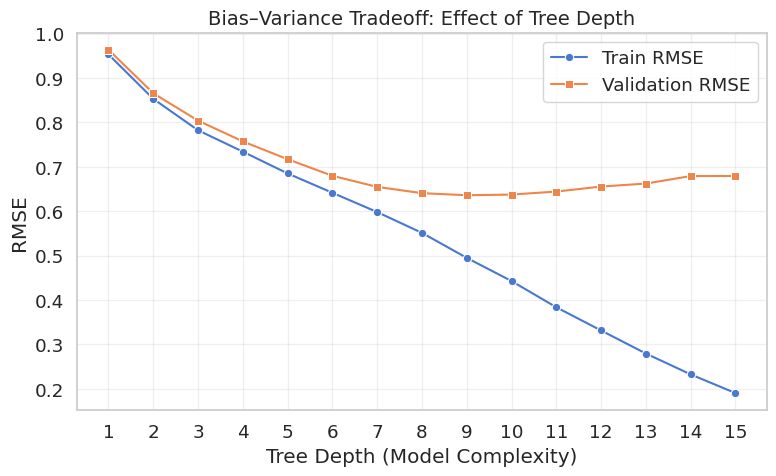

In [21]:
# =========================================================
# ⚖️ STEP 7: Bias–Variance Tradeoff Plot
# =========================================================
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 5))
sns.lineplot(x=depths, y=train_rmse, label='Train RMSE', marker='o')
sns.lineplot(x=depths, y=valid_rmse, label='Validation RMSE', marker='s')
plt.title('Bias–Variance Tradeoff: Effect of Tree Depth', fontsize=14)
plt.xlabel('Tree Depth (Model Complexity)')
plt.ylabel('RMSE')
plt.xticks(ticks=list(depths))  # remove decimal x-ticks
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

### 💬 Activity 4 — Identify the Best `max_depth`

Look at the curve above.

**Questions:**
1. At which depth does the **validation RMSE** reach its minimum?
2. Does the training RMSE keep decreasing after that point?
3. Why might validation error increase again for larger depths?

Now, using that “best” `max_depth`, retrain the model on the **entire training set** (`X_train`, `y_train`)  
and finally evaluate it on the **test set** (`X_test`, `y_test`).

<details>
<summary>💡 Click for hints</summary>

- You’re looking for the **lowest point** on the *validation RMSE* curve.  
- After that depth, the training error keeps dropping, but validation error rises → possible overfitting.  
- This “turning point” is your best depth — it balances learning the signal vs memorizing noise.  
- Retrain once with that depth on all training data (no validation split) and check how it performs on the test set.

</details>


In [22]:
# -----------------------------------------------------------
# 🧩 Activity 4 — Retrain with Best Depth and Evaluate on Test
# -----------------------------------------------------------
best_depth = int(input("Enter the best max_depth you observed from the plot: "))

final_tree = DecisionTreeRegressor(max_depth=best_depth, random_state=42)
final_tree.fit(X_train, y_train)

y_train_pred = final_tree.predict(X_train)
y_test_pred  = final_tree.predict(X_test)

rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
rmse_test  = np.sqrt(mean_squared_error(y_test,  y_test_pred))
r2_train   = r2_score(y_train, y_train_pred)
r2_test    = r2_score(y_test,  y_test_pred)

print("\n================ Final Model Evaluation ================")
print(f"| Chosen max_depth : {best_depth}")
print("|-------------------------------------------------------")
print(f"| Train RMSE : {rmse_train:.3f}   | Test RMSE : {rmse_test:.3f}")
print(f"| Train R²   : {r2_train:.3f}     | Test R²   : {r2_test:.3f}")
print("========================================================")
print("🎯 See if your model generalizes well — are train and test metrics close?")


Enter the best max_depth you observed from the plot: 10

================ Final Model Evaluation ================
| Chosen max_depth : 10
|-------------------------------------------------------
| Train RMSE : 0.470   | Test RMSE : 0.645
| Train R²   : 0.835     | Test R²   : 0.683
🎯 See if your model generalizes well — are train and test metrics close?


# 🌲 Bonus Section: Reducing Variance in Machine Learning Models

By now, you’ve seen how decision trees can easily **overfit** if they grow too deep.  
This happens because most ML models are **powerful enough to memorize** patterns in the training data,  
which makes them perform worse on unseen data.

---

## 🤔 Why Do Models Overfit?

When a model is very flexible (like a deep tree or a large neural network),  
it can perfectly match all points in the training set — even the noise!  
That means it performs well on training data but struggles on validation or test data.

So how can we **reduce variance** and make models more stable?

## 🧩 Introducing Ensembling

**Ensembling** means combining the predictions of many smaller models to create a stronger overall model.  
The idea is simple: **many weak learners together make a strong learner.**

One of the most popular ensemble methods is the **Random Forest**.

### 🌳 Random Forests in simple terms:
- Build **many decision trees**, each trained on a random subset of the data and features.  
- Each tree makes a prediction, and the **forest averages their results**.  
- Randomness ensures each tree learns something slightly different.  
- The average prediction is smoother, less noisy, and less likely to overfit.

> 🪄 Think of each tree as a student:  
> One tree may make mistakes, but if we average answers from 50 independent students,  
> we’ll likely get a more reliable overall answer.


## ⚙️ Step 1 — Training Multiple Random Forests

We’ll tune two important hyperparameters:
- `n_estimators`: number of trees in the forest 🌲  
- `max_depth`: maximum depth of each tree 🌿

We’ll run a small **grid search** over combinations of these values  
to find which pair gives the **lowest validation RMSE**.


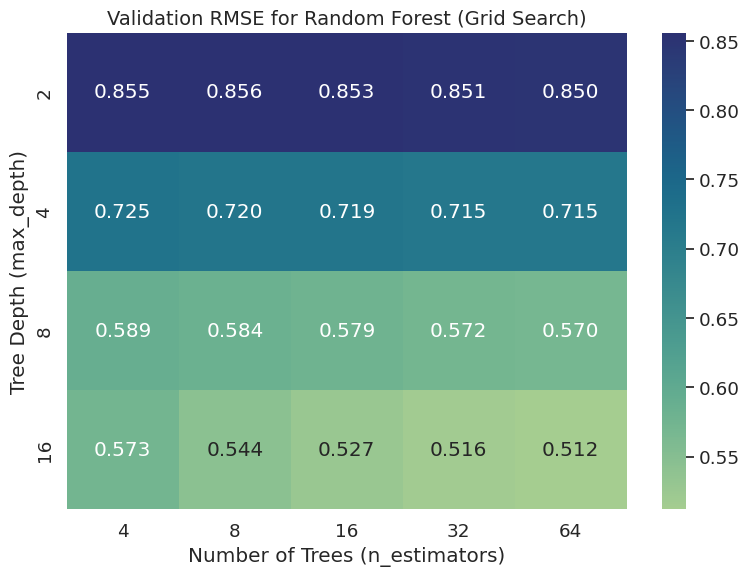

✅ Grid search complete — check the heatmap for the best combination!


In [23]:
# =========================================================
# 🌲 STEP 1: Random Forest Grid Search (tuning hyperparameters)
# =========================================================
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

results = []

for n in [4, 8, 16, 32, 64]:           # number of trees
    for d in [2, 4, 8, 16]:            # depth of each tree
        rf = RandomForestRegressor(
            n_estimators=n,
            max_depth=d,
            random_state=42,
            n_jobs=-1
        )
        rf.fit(X_train_sub, y_train_sub)
        y_valid_pred = rf.predict(X_valid)
        rmse_valid = np.sqrt(mean_squared_error(y_valid, y_valid_pred))
        results.append({'n_estimators': n, 'max_depth': d, 'val_RMSE': rmse_valid})

rf_df = pd.DataFrame(results)

# Pivot results for visualization
rf_pivot = rf_df.pivot(index='max_depth', columns='n_estimators', values='val_RMSE')

plt.figure(figsize=(8, 6))
sns.heatmap(rf_pivot, annot=True, cmap='crest', fmt=".3f")
plt.title('Validation RMSE for Random Forest (Grid Search)', fontsize=14)
plt.xlabel('Number of Trees (n_estimators)')
plt.ylabel('Tree Depth (max_depth)')
plt.tight_layout()
plt.show()

print("✅ Grid search complete — check the heatmap for the best combination!")

---

### 💬 Activity 5 — Discussion: Interpreting the Heatmap

Take a moment to examine the **validation RMSE heatmap**.

**Questions:**
1. What happens to the RMSE as we increase the number of trees (`n_estimators`)?  
2. What happens as we increase the depth (`max_depth`)?  
3. Which combination of these hyperparameters gives the *lowest* validation error?

<details>
<summary>💡 Click for hints</summary>

- More trees generally make the model more stable (but take longer to train).  
- Deeper trees can capture more detail, but too much depth can lead to overfitting — just like before!  
- You’re looking for the smallest number in the heatmap (lowest validation RMSE).  
  That combination represents the most balanced model.
</details>

---


## 🏆 Step 2 — Evaluating the Best Model on the Test Set

Now that we’ve found the best hyperparameters from the validation results,  
let’s retrain a final Random Forest using those values on the **entire training data**  
and then test it on the **unseen test set**.[link text](https://)

In [24]:
# =========================================================
# 🏆 STEP 2: Final Evaluation on Test Data
# =========================================================
best_params = rf_df.loc[rf_df['val_RMSE'].idxmin()]
print(f"Best hyperparameters: {best_params.to_dict()}")

rf_best = RandomForestRegressor(
    n_estimators=int(best_params['n_estimators']),
    max_depth=int(best_params['max_depth']),
    random_state=42,
    n_jobs=-1
)
rf_best.fit(X_train, y_train)

# Evaluate on test data
y_test_pred = rf_best.predict(X_test)
rf_rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
rf_r2_test = r2_score(y_test, y_test_pred)

print("\n🎯 Final Random Forest Performance on Test Data")
print("=================================================")
print(f"| RMSE : {rf_rmse_test:.3f}")
print(f"| R²   : {rf_r2_test:.3f}")
print("=================================================")

Best hyperparameters: {'n_estimators': 64.0, 'max_depth': 16.0, 'val_RMSE': 0.5120400231652359}

🎯 Final Random Forest Performance on Test Data
| RMSE : 0.510
| R²   : 0.802


---

### 💬 Discussion — Comparing Random Forest vs Tuned Decision Tree

Now that we’ve evaluated the **Random Forest** on the test set,  
let’s compare its performance to the **best Decision Tree** model you found earlier (from Activity 4).

**Questions:**
1. Are the Random Forest’s test RMSE and R² better than those of the tuned Decision Tree?  
2. If yes — *why* do you think that happened?  
3. What trade-offs might we face when using a Random Forest instead of a single Decision Tree?

<details>
<summary>💡 Click to view hints</summary>

- Random Forests combine the outputs of many trees, so their predictions are **more stable** and less affected by noise.  
- This **reduces variance**, which often leads to **lower RMSE** and **higher R²** on unseen data.  
- However, because they average over many trees, Random Forests lose some of the **interpretability** that makes single trees so easy to understand.  
- In general:  
  - 🎯 **Decision Tree:** simple, interpretable, but prone to overfitting.  
  - 🌳 **Random Forest:** complex, harder to visualize, but usually more accurate and robust.
</details>

---


# 🎓 Conclusion — Putting It All Together

Congratulations! You’ve now completed a full walkthrough of how to **evaluate, tune, and interpret** a machine learning model from start to finish.

Let’s recap what we accomplished:

---

## ✅ What We Did

1. **Prepared and inspected data**  
   - Explored the California Housing dataset and visualized its features.  
   - Discussed what each feature represents and how it might influence the target.

2. **Split the data into training and testing sets**  
   - Understood why separate data is needed to fairly measure performance.

3. **Trained our first model — Decision Tree**  
   - Learned how models use data to make predictions.  
   - Introduced the idea of *hyperparameters* and how they control learning.

4. **Evaluated performance using RMSE and R²**  
   - Understood what these metrics mean and how to interpret their values.  
   - Practiced computing RMSE manually for intuition.

5. **Tuned hyperparameters and introduced the validation split**  
   - Observed how changing `max_depth` affects performance.  
   - Learned why using a validation set helps us choose fair hyperparameters.

6. **Explored the Bias–Variance Tradeoff**  
   - Visualized how model complexity influences training and validation errors.  
   - Defined *underfitting* (high bias) and *overfitting* (high variance).  
   - Identified the “sweet spot” where the model generalizes best.

7. **Reduced variance using Random Forests**  
   - Saw how combining many trees makes predictions more stable.  
   - Compared results against our tuned Decision Tree and discussed why ensembles often perform better.

---

## 🧠 Key Takeaways

- **Model evaluation** is not just about metrics — it’s about understanding *why* a model performs the way it does.  
- **Hyperparameter tuning** is about balancing learning power with generalization.  
- **Bias–variance tradeoff** helps us reason about model behavior across complexity levels.  
- **Ensembles** are a practical way to reduce variance and improve stability.  
- These same ideas apply to *any* ML or DL model — from simple regressions to neural networks.

---

## 💬 Final Discussion — Applying ML to Your Own Domain

Now it’s your turn!  
Think about a problem in your **own field or area of interest** where you could apply what you’ve learned.

**Question:**  
> Can you describe one problem where machine learning might be useful?  

In your answer, include:
1. 🎯 **Goal:** What are you trying to predict or classify?  
2. 🧩 **Input features:** What data or variables would you use as inputs?  
3. 🎯 **Output:** Is it a continuous number (regression) or a category (classification)?  
4. 📊 **Data collection:** Where could the data come from? Is it already available or needs to be created?  
5. ⚖️ **Evaluation:** How would you measure if your model is performing well?  
6. 💡 **Next steps:** How could you improve the model once you have a baseline?

Take a few minutes to think and discuss in your group.  
Be as specific as possible — the goal is to start **connecting machine learning to your own research or real-world problems.**

---

> 🏁 **End of Notebook:**  
> You’ve now built, evaluated, and improved real ML models — and more importantly,  
> you’ve learned a structured way to think about *how* and *why* they work.
>
> 🌱 The next step? Try applying this same process to your own dataset or domain problem.


---

# 📚 References & Further Reading

If you’d like to explore these ideas in more depth, here are some excellent beginner-friendly resources that inspired parts of this notebook:

### 🧩 General ML Workflow
- [Preparing data for a machine learning model — Jeremy Jordan](https://www.jeremyjordan.me/preparing-data-for-a-machine-learning-model/)  
  A practical guide on data preprocessing and feature selection.
- [Evaluating a machine learning model — Jeremy Jordan](https://www.jeremyjordan.me/evaluating-a-machine-learning-model/)  
  Explains key evaluation concepts such as overfitting, validation, and test performance.

### ⚙️ Hyperparameter Tuning & Validation
- [Hyperparameter tuning — Jeremy Jordan](https://www.jeremyjordan.me/hyperparameter-tuning/)  
  Clear explanation of why tuning matters and how to do it responsibly.
- [Better validation and test strategies — Chang-Hsin Lee](https://changhsinlee.com/better-validation-test/)  
  Discusses data leakage, proper validation splits, and fair model comparison.
- [Model validation techniques explained — Towards Data Science](https://towardsdatascience.com/model-validation-techniques-explained-a-visual-guide-with-code-examples-eb13bbdc8f88/)  
  Visual guide to different validation strategies such as hold-out, K-fold, and cross-validation.

### 🌳 Feature Engineering
- [Feature Engineering Course — Kaggle Learn](https://www.kaggle.com/learn/feature-engineering)  
  Hands-on introduction to encoding, scaling, and transforming features for better model performance.

### ⚖️ Bias–Variance & Model Interpretation
- [Bias–Variance Tradeoff Explained — Towards Data Science](https://towardsdatascience.com/bias-variance-tradeoff-explained-a-visual-guide-with-code-examples-for-beginners-9521871f728a/)  
  Excellent visual explanation of underfitting, overfitting, and model complexity.